<h1>REALESTATE</h1> 
<h3>Name: RISHIKESH WAGHELA </h3>
<p
<div class="alert alert-block alert-info" style="margin-top: 30px">
    <ul>
        <li>
            <a href="#DATA PREPARATION">DATA PREPARATION</a>
        </li>
        <li>
            <a href="#BEAUTIFUL">PUSHING DATA INTO MONGODB CONTAINER</a>
        </li>
        <li>
            <a href="#question1"> QUESTION 1</a>
        </li>
         <li>
            <a href="#question2">QUESTION 2</a>
        </li>
        <li>
            <a href="#question3">QUESTION 3</a>
        </li>
    </ul>
</div>
<hr>

<h1 id ="DATA PREPARATION">DATA PREPARATION</h1>

In [308]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

# Ignore all warnings
warnings.filterwarnings("ignore")

In [309]:
## import all srap data
mumbai_city = pd.read_csv("/Users/raw/Desktop/Python_ca2/mumbai_city.csv", low_memory= False)
chennai_city = pd.read_csv("/Users/raw/Desktop/Python_ca2/chennai_city.csv", low_memory=False)
delhi_city = pd.read_csv("/Users/raw/Desktop/Python_ca2/delhi_city.csv", low_memory=False)

In [310]:
### MERGING THREE DATAFRAMES
data_final = pd.concat([mumbai_city, chennai_city , delhi_city] , axis= 0 , ignore_index=True)

In [311]:
data_final

,Unnamed: 0,status,sqtr,prices,price_tag,bhk,Apartment,possesion,size,latitude,longitude,seller_type,city
0,0,Under Construction,"6,848 / sq ft",59.98,L,2 BHK Apartment,in Soundlines Codename Urban Rainforest,Possession by Feb 2026,876,18.944899,73.165840,BUILDER,"Panvel, Mumbai"
1,1,Under Construction,"37,146 / sq ft",2.89,Cr,3 BHK Apartment,in Sanghvi Infenia,Possession by Dec 2026,778,19.073269,72.861008,BUILDER,"Santacruz East, Mumbai"
2,2,Under Construction,"14,280 / sq ft",94.11,L,2 BHK Apartment,in Origin Oriana,Possession by Nov 2024,659,19.288668,72.879280,BUILDER,"Mira Road East, Mumbai"
3,3,Under Construction,"6,813 / sq ft",1.99,Cr,5 BHK Villa,in Agami Estancia,Possession by Jun 2024,2921,19.781849,72.802788,BUILDER,"Boisar, Mumbai"
4,4,Under Construction,"6,329 / sq ft",33.99,L,2 BHK Apartment,in Dashmesh Empire,Possession by May 2027,537,19.166450,73.236557,BUILDER,"Badlapur East, Mumbai"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179935,39975,Ready to move,"28,821 / sq ft",18.79,Cr,4 BHK Independent House,in B kumar and brothers the passion group,4 years old,6521,28.505278,77.207413,AGENT,"Sainik Farm, Delhi"
179936,39976,Ready to move,"21,531 / sq ft",14.04,Cr,4 BHK Villa,in B kumar and brothers the passion group,4 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi"
179937,39977,Ready to move,"50,060 / sq ft",32.64,Cr,5 BHK Villa,in B kumar and brothers the passion group,3 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi"
179938,39978,Ready to move,"46,160 / sq ft",30.1,Cr,5 BHK Penthouse,in B kumar and brothers the passion grouo,3 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi"


In [312]:
## droping the unnecessary column 
data_final.drop("Unnamed: 0", axis= 1 , inplace=True)

In [313]:
data_final.head()


,status,sqtr,prices,price_tag,bhk,Apartment,possesion,size,latitude,longitude,seller_type,city
0,Under Construction,"6,848 / sq ft",59.98,L,2 BHK Apartment,in Soundlines Codename Urban Rainforest,Possession by Feb 2026,876,18.944899,73.165840,BUILDER,"Panvel, Mumbai"
1,Under Construction,"37,146 / sq ft",2.89,Cr,3 BHK Apartment,in Sanghvi Infenia,Possession by Dec 2026,778,19.073269,72.861008,BUILDER,"Santacruz East, Mumbai"
2,Under Construction,"14,280 / sq ft",94.11,L,2 BHK Apartment,in Origin Oriana,Possession by Nov 2024,659,19.288668,72.879280,BUILDER,"Mira Road East, Mumbai"
3,Under Construction,"6,813 / sq ft",1.99,Cr,5 BHK Villa,in Agami Estancia,Possession by Jun 2024,2921,19.781849,72.802788,BUILDER,"Boisar, Mumbai"
4,Under Construction,"6,329 / sq ft",33.99,L,2 BHK Apartment,in Dashmesh Empire,Possession by May 2027,537,19.166450,73.236557,BUILDER,"Badlapur East, Mumbai"


In [314]:
data_final["Apartment"] = data_final["Apartment"].str.replace("in","",1) # removing in from the apartment column

In [315]:
data_final["Type_of_house"] = data_final["bhk"].str.split().str[2] # making a new column name as type of houses

### PRICE COLUMN

In [316]:
#chennai_city["PRICE"] = chennai_city["prices"].astype(str)+chennai_city["price_tag"]
data_final["Price"] = data_final["prices"].astype(str)+data_final["price_tag"]  # adding two column prices and price_tag


In [317]:
data_final

,status,sqtr,prices,price_tag,bhk,Apartment,possesion,size,latitude,longitude,seller_type,city,Type_of_house,Price
0,Under Construction,"6,848 / sq ft",59.98,L,2 BHK Apartment,Soundlines Codename Urban Rainforest,Possession by Feb 2026,876,18.944899,73.165840,BUILDER,"Panvel, Mumbai",Apartment,59.98L
1,Under Construction,"37,146 / sq ft",2.89,Cr,3 BHK Apartment,Sanghvi Infenia,Possession by Dec 2026,778,19.073269,72.861008,BUILDER,"Santacruz East, Mumbai",Apartment,2.89Cr
2,Under Construction,"14,280 / sq ft",94.11,L,2 BHK Apartment,Origin Oriana,Possession by Nov 2024,659,19.288668,72.879280,BUILDER,"Mira Road East, Mumbai",Apartment,94.11L
3,Under Construction,"6,813 / sq ft",1.99,Cr,5 BHK Villa,Agami Estancia,Possession by Jun 2024,2921,19.781849,72.802788,BUILDER,"Boisar, Mumbai",Villa,1.99Cr
4,Under Construction,"6,329 / sq ft",33.99,L,2 BHK Apartment,Dashmesh Empire,Possession by May 2027,537,19.166450,73.236557,BUILDER,"Badlapur East, Mumbai",Apartment,33.99L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179935,Ready to move,"28,821 / sq ft",18.79,Cr,4 BHK Independent House,B kumar and brothers the passion group,4 years old,6521,28.505278,77.207413,AGENT,"Sainik Farm, Delhi",Independent,18.79Cr
179936,Ready to move,"21,531 / sq ft",14.04,Cr,4 BHK Villa,B kumar and brothers the passion group,4 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi",Villa,14.04Cr
179937,Ready to move,"50,060 / sq ft",32.64,Cr,5 BHK Villa,B kumar and brothers the passion group,3 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi",Villa,32.64Cr
179938,Ready to move,"46,160 / sq ft",30.1,Cr,5 BHK Penthouse,B kumar and brothers the passion grouo,3 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi",Penthouse,30.1Cr


In [318]:

#mumbai_city.drop(["prices","price_tag"], axis =1, inplace=True)

# making two function for prices column if suffixes is L place that with 100000 and if Cr place with 10000000

suffixes = {'L': 1e5, 'Cr': 1e7}

# Define a function to convert a string to a numeric value
def crore_value(cr):
    if isinstance(cr, str):
        suffix = cr[-2:]
        if suffix in suffixes:
            multiplier = suffixes[suffix]
            numeric_value = float(cr[:-2]) * multiplier
            return numeric_value
    return cr
def lakh_value(l):
    if isinstance(l, str):
        suffix = l[-1]
        if suffix in suffixes:
            multiplier = suffixes[suffix]
            numeric_value = float(l[:-1]) * multiplier
            return numeric_value
        #elif suffix == 'L':
            n#umeric_value = float(l[:-1]) * 1e5
            #return numeric_value
    return l

In [319]:
## applying our function on Price column 

data_final["Price"] = data_final["Price"].apply(crore_value)
data_final["Price"] = data_final["Price"].apply(lakh_value)

In [320]:
# droping the prices and price_tag column
data_final.drop(["prices","price_tag"], axis= 1 , inplace= True)

In [321]:
# a gisp of the data 
data_final

,status,sqtr,bhk,Apartment,possesion,size,latitude,longitude,seller_type,city,Type_of_house,Price
0,Under Construction,"6,848 / sq ft",2 BHK Apartment,Soundlines Codename Urban Rainforest,Possession by Feb 2026,876,18.944899,73.165840,BUILDER,"Panvel, Mumbai",Apartment,5998000.0
1,Under Construction,"37,146 / sq ft",3 BHK Apartment,Sanghvi Infenia,Possession by Dec 2026,778,19.073269,72.861008,BUILDER,"Santacruz East, Mumbai",Apartment,28900000.0
2,Under Construction,"14,280 / sq ft",2 BHK Apartment,Origin Oriana,Possession by Nov 2024,659,19.288668,72.879280,BUILDER,"Mira Road East, Mumbai",Apartment,9411000.0
3,Under Construction,"6,813 / sq ft",5 BHK Villa,Agami Estancia,Possession by Jun 2024,2921,19.781849,72.802788,BUILDER,"Boisar, Mumbai",Villa,19900000.0
4,Under Construction,"6,329 / sq ft",2 BHK Apartment,Dashmesh Empire,Possession by May 2027,537,19.166450,73.236557,BUILDER,"Badlapur East, Mumbai",Apartment,3399000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
179935,Ready to move,"28,821 / sq ft",4 BHK Independent House,B kumar and brothers the passion group,4 years old,6521,28.505278,77.207413,AGENT,"Sainik Farm, Delhi",Independent,187900000.0
179936,Ready to move,"21,531 / sq ft",4 BHK Villa,B kumar and brothers the passion group,4 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi",Villa,140400000.0
179937,Ready to move,"50,060 / sq ft",5 BHK Villa,B kumar and brothers the passion group,3 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi",Villa,326400000.0
179938,Ready to move,"46,160 / sq ft",5 BHK Penthouse,B kumar and brothers the passion grouo,3 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi",Penthouse,301000000.0


In [322]:
data_final["Type_of_house"].unique()


array(['Apartment', 'Villa', 'Studio', nan, 'Independent', 'Penthouse'],
      dtype=object)

### BHK COLUMN

In [323]:
### now removing a extra apartment part in bhk column
data_final["bhk"] = data_final["bhk"].str.split().apply(lambda x: " ".join([word for i, word in enumerate(x) if i != 2]))

In [324]:
data_final

,status,sqtr,bhk,Apartment,possesion,size,latitude,longitude,seller_type,city,Type_of_house,Price
0,Under Construction,"6,848 / sq ft",2 BHK,Soundlines Codename Urban Rainforest,Possession by Feb 2026,876,18.944899,73.165840,BUILDER,"Panvel, Mumbai",Apartment,5998000.0
1,Under Construction,"37,146 / sq ft",3 BHK,Sanghvi Infenia,Possession by Dec 2026,778,19.073269,72.861008,BUILDER,"Santacruz East, Mumbai",Apartment,28900000.0
2,Under Construction,"14,280 / sq ft",2 BHK,Origin Oriana,Possession by Nov 2024,659,19.288668,72.879280,BUILDER,"Mira Road East, Mumbai",Apartment,9411000.0
3,Under Construction,"6,813 / sq ft",5 BHK,Agami Estancia,Possession by Jun 2024,2921,19.781849,72.802788,BUILDER,"Boisar, Mumbai",Villa,19900000.0
4,Under Construction,"6,329 / sq ft",2 BHK,Dashmesh Empire,Possession by May 2027,537,19.166450,73.236557,BUILDER,"Badlapur East, Mumbai",Apartment,3399000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
179935,Ready to move,"28,821 / sq ft",4 BHK House,B kumar and brothers the passion group,4 years old,6521,28.505278,77.207413,AGENT,"Sainik Farm, Delhi",Independent,187900000.0
179936,Ready to move,"21,531 / sq ft",4 BHK,B kumar and brothers the passion group,4 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi",Villa,140400000.0
179937,Ready to move,"50,060 / sq ft",5 BHK,B kumar and brothers the passion group,3 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi",Villa,326400000.0
179938,Ready to move,"46,160 / sq ft",5 BHK,B kumar and brothers the passion grouo,3 years old,6521,28.495720,77.135811,AGENT,"Ghitorni, Delhi",Penthouse,301000000.0


In [325]:
def removing_words(x, index_number):
    words = x.split()
    filtering_words = [word for z, word in enumerate(words) if z != index_number]
    return " ".join(filtering_words)

data_final["bhk"] = data_final["bhk"].apply(lambda x: removing_words(x,1))
# apply two times for the unnecessary floor and apartments in the column
data_final["bhk"]= data_final["bhk"].apply(lambda x : removing_words(x,1))

In [326]:
data_final["bhk"].unique()

array(['2', '3', '5', '1', '4', 'Residential', '6', '8', '10', '7', '9',
       '15', '12', '11', '14'], dtype=object)

In [327]:
data_final["bhk"] = data_final["bhk"].str.replace("Residential","0" ).astype(int)

In [328]:
data_final["bhk"].unique()

array([ 2,  3,  5,  1,  4,  0,  6,  8, 10,  7,  9, 15, 12, 11, 14])

### sqft Column

In [329]:
data_final["sqft"] = data_final["sqtr"].str.replace(" / sq ft", "")
data_final.drop("sqtr" , axis = 1 , inplace = True)

In [330]:
data_final.head()

,status,bhk,Apartment,possesion,size,latitude,longitude,seller_type,city,Type_of_house,Price,sqft
0,Under Construction,2,Soundlines Codename Urban Rainforest,Possession by Feb 2026,876,18.944899,73.165840,BUILDER,"Panvel, Mumbai",Apartment,5998000.0,"6,848"
1,Under Construction,3,Sanghvi Infenia,Possession by Dec 2026,778,19.073269,72.861008,BUILDER,"Santacruz East, Mumbai",Apartment,28900000.0,"37,146"
2,Under Construction,2,Origin Oriana,Possession by Nov 2024,659,19.288668,72.879280,BUILDER,"Mira Road East, Mumbai",Apartment,9411000.0,"14,280"
3,Under Construction,5,Agami Estancia,Possession by Jun 2024,2921,19.781849,72.802788,BUILDER,"Boisar, Mumbai",Villa,19900000.0,"6,813"
4,Under Construction,2,Dashmesh Empire,Possession by May 2027,537,19.166450,73.236557,BUILDER,"Badlapur East, Mumbai",Apartment,3399000.0,"6,329"


In [331]:
data_final["sqft"] = data_final["sqft"].str.replace(",","").replace("Price","0").astype(float).astype(int)


In [332]:
##data_finalsad making a new column where there cities would be save
data_final["CITY"] = data_final["city"].str.split().str[-1]

In [333]:
data_final.rename({"city":"area"} , axis=1 , inplace=True) # renaming the first city column with area

In [334]:
data_final["area"]

0                 Panvel, Mumbai
1         Santacruz East, Mumbai
2         Mira Road East, Mumbai
3                 Boisar, Mumbai
4          Badlapur East, Mumbai
                   ...          
179935        Sainik Farm, Delhi
179936           Ghitorni, Delhi
179937           Ghitorni, Delhi
179938           Ghitorni, Delhi
179939           Ghitorni, Delhi
Name: area, Length: 179940, dtype: object

In [335]:
data_final["area"] = data_final["area"].str.replace(", Mumbai","").str.replace(", Delhi","").str.replace(", Chennai","") 
# removing unecesarry cities from area column

In [336]:
data_final.tail()

,status,bhk,Apartment,possesion,size,latitude,longitude,seller_type,area,Type_of_house,Price,sqft,CITY
179935,Ready to move,4,B kumar and brothers the passion group,4 years old,6521,28.505278,77.207413,AGENT,Sainik Farm,Independent,187900000.0,28821,Delhi
179936,Ready to move,4,B kumar and brothers the passion group,4 years old,6521,28.495720,77.135811,AGENT,Ghitorni,Villa,140400000.0,21531,Delhi
179937,Ready to move,5,B kumar and brothers the passion group,3 years old,6521,28.495720,77.135811,AGENT,Ghitorni,Villa,326400000.0,50060,Delhi
179938,Ready to move,5,B kumar and brothers the passion grouo,3 years old,6521,28.495720,77.135811,AGENT,Ghitorni,Penthouse,301000000.0,46160,Delhi
179939,Ready to move,5,B kumar and brothers the passion group,3 years old,6521,28.495720,77.135811,AGENT,Ghitorni,Independent,201000000.0,30825,Delhi


In [337]:
data_final.fillna(0, inplace=True)

In [338]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179940 entries, 0 to 179939
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   status         179940 non-null  object 
 1   bhk            179940 non-null  int64  
 2   Apartment      179940 non-null  object 
 3   possesion      179940 non-null  object 
 4   size           179940 non-null  int64  
 5   latitude       179940 non-null  float64
 6   longitude      179940 non-null  float64
 7   seller_type    179940 non-null  object 
 8   area           179940 non-null  object 
 9   Type_of_house  179940 non-null  object 
 10  Price          179940 non-null  float64
 11  sqft           179940 non-null  int64  
 12  CITY           179940 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 17.8+ MB


<h1 id ="BEAUTIFUL">PUSHING DATA INTO MONGODB CONTAINER</h1>

In [339]:
import pymongo
import json
import requests
client = pymongo.MongoClient("mongodb+srv://Rishikesh_waghela:@cluster0.kbf2pkm.mongodb.net/?retryWrites=true&w=majority")# password
db = client["mydata"]
collection=db['listings']


'import pymongo\nimport json\nimport requests\nclient = pymongo.MongoClient("mongodb+srv://Rishikesh_waghela:@cluster0.kbf2pkm.mongodb.net/?retryWrites=true&w=majority")\ndb = client["mydata"]\ncollection=db[\'listings\']\n'

In [340]:
print(client.list_database_names())

'print(client.list_database_names())'

In [341]:
Three_cities = data_final.to_dict(orient= "records")
Three_cities

'Three_cities = data_final.to_dict(orient= "records")\nThree_cities'

In [342]:

db = client["RAW"]
db.Cities.insert_many(Three_cities)

'\ndb = client["RAW"]\ndb.Cities.insert_many(Three_cities)'

In [343]:
print(client.list_database_names())

'print(client.list_database_names())'

### RAW NEW DATA BASE HAS CREATED AND ALL VALUES

<h1 id ="question1"> MOST EXPENSIVE AREA OF MUMBAI</h1>



In [346]:
area_prices = data_final.groupby(["CITY","area"], as_index=False)["sqft"].mean() # taking a mean of the areas and grouby by city

In [347]:
area_prices["sqft"] = area_prices["sqft"].astype(int) # int type for analysis

In [348]:
df = area_prices[area_prices["CITY"] == "Mumbai"].sort_values("sqft", ascending=False)\
    .head(20)
df

,CITY,area,sqft
1286,Mumbai,Banganga Cross Lane,96666
1285,Mumbai,Bandstand,96296
1528,Mumbai,Marine Drive,89997
1334,Mumbai,Churchgate,84631
1281,Mumbai,Bandra,73103
1792,Mumbai,Walkeshwar,64852
1805,Mumbai,juhu tara,63636
1518,Mumbai,MalabarHill,61538
1517,Mumbai,Malabar Hill,57417
1540,Mumbai,Mount Marry,56910


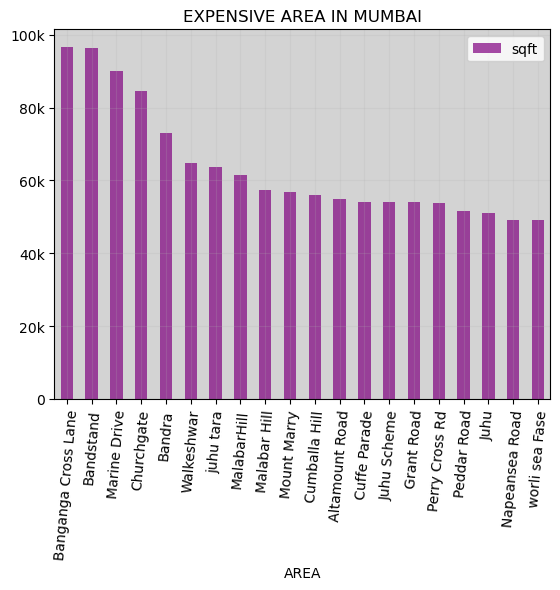

In [349]:
### all city mumbai and plotting the graph with 20 most expensive areas in the mumbai

df = area_prices[area_prices["CITY"] == "Mumbai"].sort_values("sqft", ascending=False)\
    .head(20).plot(kind = "bar" , x = "area" , y = "sqft" , title = "EXPENSIVE AREA IN MUMBAI" , color= "purple"  , alpha = 0.7, rot = 85,
                   xlabel = "AREA")

df.set_yticklabels(["0" , "20k" , "40k","60k","80k","100k"])
df.grid(alpha = 0.2)
df.set_facecolor("lightgray")
plt.show()

                   #plt.yticks = ([0,2e4,4e4,6e4,8e4,1e5],["0" , "20k" , "40k","60k","80k","100k"])
#plt.show()

                                                            
                                                            response
                                                            
Malabar Hill comes twice on the list, as can be seen, showing that it is a highly sought-after neighborhood in Mumbai. Popular areas like Bandra, Juhu, and Worli are also among the top 20 areas. These neighbourhoods are well-known for their opulent homes, luxurious amenities, and convenient location to Mumbai's commercial and entertainment centers.

Please be aware that these costs could change based on the specific property and other elements like age, location, and amenities. However, the information gives a general notion of Mumbai's most pricey neighborhoods, which may be helpful for anyone intending to invest in the city's real estate.


<h1 id ="question2"> UPCOMING REALESTATE CONSTRUCTION PROJECTS IN THREE CITIES</h1>

In [350]:

df_UC_all =data_final[data_final["status"] == "Under Construction"]
df_UC_all['year'] = df_UC_all['possesion'].str.extract('(\d{4})') ### last 4 
df_UC_all.drop("possesion", axis=1 , inplace = True)



In [351]:
df  = df_UC_all.dropna() # making a new dataframe is zero null values for the visualization

In [352]:
df["year"].unique()
df['year'] = df["year"].astype(int)

In [353]:
df_UC_all["year"].unique()

array(['2026', '2024', '2027', '2023', '2025', nan, '2029', '2028',
       '2021', '2022', '2030', '2020', '1899', '2031', '2036', '0002',
       '1969'], dtype=object)

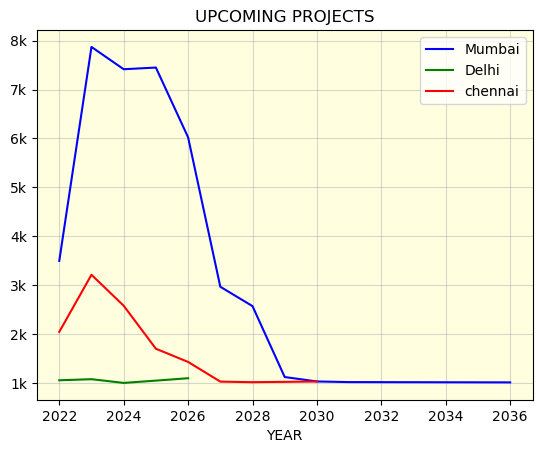

In [354]:
#years = [2022, 2023 , 2024 , 2025 , 2026 , 2027 , 2028 , 2029 , 2030]

### the upcoming projects of all three cities 

df_mumbai = df[(df["CITY"] == "Mumbai")& (df["year"]> 2021)].groupby("year")["status"].agg("count").plot(kind = "line" , color = "blue")
df[(df["CITY"] == "Delhi") & (df["year"]> 2021)].groupby("year")["status"].agg("count").plot(kind = "line" , color = "green")
df[(df["CITY"] == "Chennai")& (df["year"]> 2021)].groupby("year")["status"].agg("count").plot(kind = "line", color = "red")
plt.legend(["Mumbai","Delhi","chennai"])
plt.title("UPCOMING PROJECTS")
plt.grid(alpha = 0.5)
df_mumbai.set_yticklabels(["0" , "1k" , "2k","3k","4k","5k","6k","7k","8k"])
df_mumbai.set_facecolor('lightyellow')
plt.xlabel("YEAR")
#plt.xticks(years)

plt.show()

                                                        Response

With over 7,000 new buildings in 2023 and a slight decline in 2024, Mumbai will continue to host the majority of new construction. In contrast, there would only be 3.1k developments in Chennai in 2023.There are a fairly small number of projects in Delhi.
Additionally, there are under Construction developments in Mumbai that are for sale and will be ready for ownership in 2036.

<h1 id = "question3">ALL CONSTRUCTION PROJECTS OF LODHA GROUP</h1>

In [355]:
data_final["Apartment"] = data_final["Apartment"].astype(str) # changing the type of the type of column

In [356]:
data_final["Apartment"].unique()

array([' Soundlines Codename Urban Rainforest', ' Sanghvi Infenia',
       ' Origin Oriana', ..., ' Reputed Builder Sadar Apartments',
       ' Reputed Builder Supreme Enclave',
       ' Reputed Builder Shekhar Apartment'], dtype=object)

In [357]:
lodha =[]

for index, row in data_final.iterrows():
    # Check if the "Apartment" column contains "Lodha"
    if 'Lodha' in row['Apartment']:
        # If it does, append the apartment name to the "lodha" list
        lodha.append(row['Apartment'])
    

In [358]:
Lodha_df = data_final[(data_final["Apartment"].isin(lodha))]
Lodha_df

,status,bhk,Apartment,possesion,size,latitude,longitude,seller_type,area,Type_of_house,Price,sqft,CITY
310,Ready to move,2,Lodha Aqua,9 - 10 years old,889,19.265213,72.873146,VERIFIED OWNER,Mira Road East,Apartment,11100000.0,12485,Mumbai
531,Ready to move,2,Lodha Upper Thane,0 - 1 year old,830,19.239986,73.046234,VERIFIED OWNER,Anjurdive,Apartment,7300000.0,8795,Mumbai
543,Ready to move,3,Lodha Aqua,9 - 10 years old,1665,19.265213,72.873146,VERIFIED OWNER,Mira Road East,Apartment,19900000.0,11951,Mumbai
545,Ready to move,1,Lodha Mira Road Project 1,0 - 1 year old,756,19.283676,72.880173,VERIFIED OWNER,Mira Road East,Apartment,7700000.0,10185,Mumbai
546,Ready to move,1,Lodha Mira Road Project 1,0 - 1 year old,785,19.283676,72.880173,VERIFIED OWNER,Mira Road East,Apartment,7600000.0,9681,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99486,Under Construction,2,Lodha Upper Thane,Possession by Aug 2022,558,19.239986,73.046234,AGENT,Anjurdive,Apartment,7010000.0,12563,Mumbai
99487,Under Construction,3,Lodha Upper Thane,Possession by Aug 2022,986,19.239986,73.046234,AGENT,Anjurdive,Apartment,12100000.0,12340,Mumbai
99488,Under Construction,1,Lodha Upper Thane,Possession by Aug 2022,444,19.239986,73.046234,AGENT,Anjurdive,Apartment,5237000.0,11796,Mumbai
99489,Under Construction,2,Lodha Upper Thane,Possession by Aug 2022,489,19.239986,73.046234,AGENT,Anjurdive,Apartment,6065000.0,12404,Mumbai


In [359]:
Lodha_df.pivot_table("bhk", columns= ["Type_of_house"], index="CITY" ,aggfunc=("count") , margins=True)

Type_of_house,0,Apartment,Independent,Penthouse,Studio,Villa,All
CITY,,,,,,,
Mumbai,23,4420,1,1,2,20,4467
All,23,4420,1,1,2,20,4467


                                                Response
                                                
Lodha builder merely have construction in mumbai

In mumbai we have 4420 apartments of lodha properties, 1 penthouse , 2 studio and 20 villas

For those wishing to invest in real estate developments in these areas, this information may be helpful. It also sheds light on the kinds of housing possibilities that Lodha provides in each city. 
It should be emphasized that this information only represents one developer of real estate; in each city, there may be several developers who provide a wider range of housing possibilities.